In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/adam_wbn"
image_path = "./images/adam_wbn"
os.makedirs(image_path,exist_ok=True)

2025-03-08 21:19:24.317807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-08 21:19:24.327335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-08 21:19:24.330040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 21:19:24.830875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Max test accuracy of Standard is 86.12% with lr 0.008028
Max test accuracy of Norm_p1 is 87.14% with p 0.00025
Max test accuracy of CNorm_p1 is 86.4% with p 0.000207
Max test accuracy of CNormU_p1 is 87.04% with p 0.00025
Max test accuracy of GCStdU_p1 is 87.18% with p 0.00025
Max test accuracy of Norm is 87.32% with p 5.2
Max test accuracy of CNorm is 87.18% with p 4.0
Max test accuracy of CNormU is 87.52% with p 4.4
Max test accuracy of GCStdU is 87.48% with p 4.8
Max test accuracy of wd is 85.46% with lambda 3.1249999999999946e-08


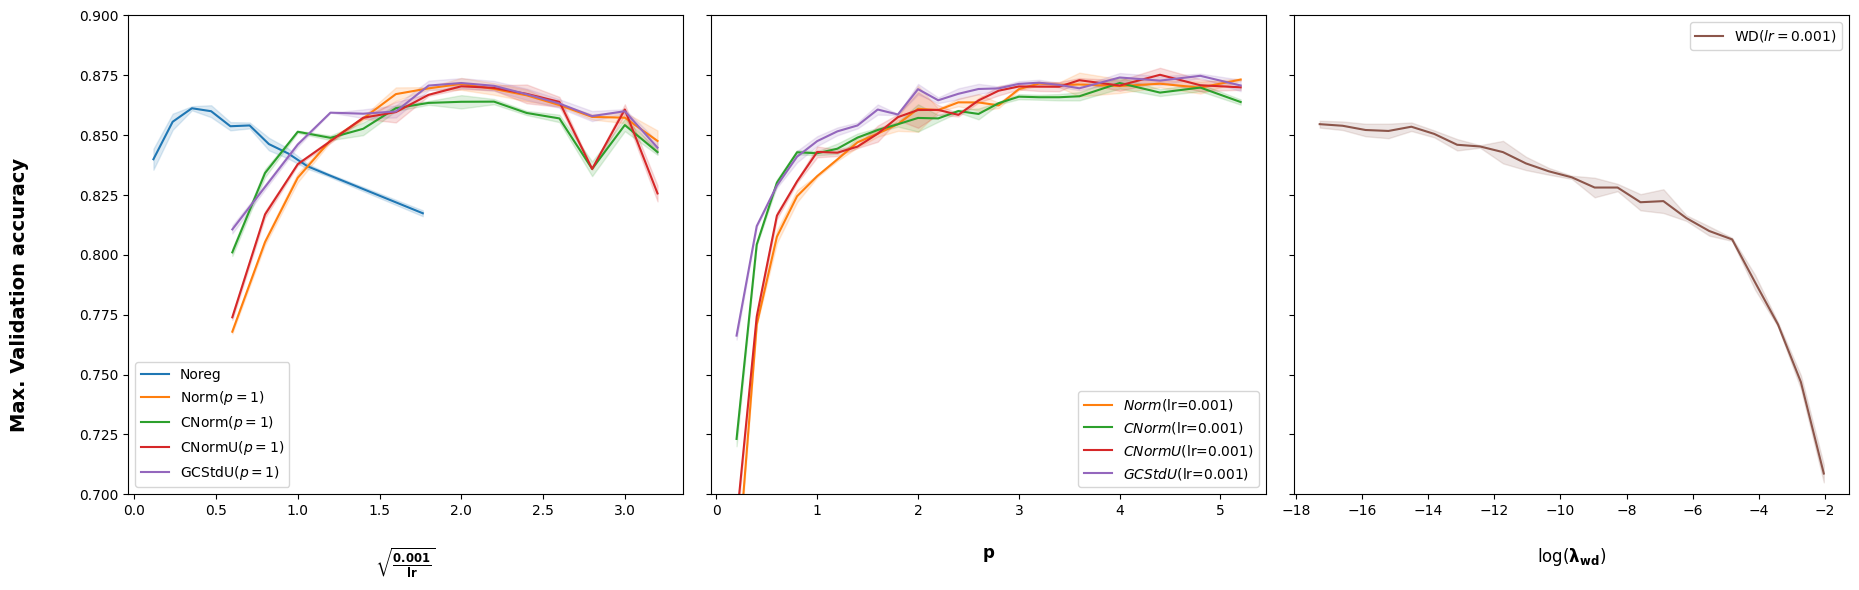

In [4]:
plot_wbn_setting_hyperparam_max_acc(data_path,image_path,["Norm_p1","CNorm_p1","CNormU_p1","GCStdU_p1"],["Norm","CNorm","CNormU","GCStdU"])

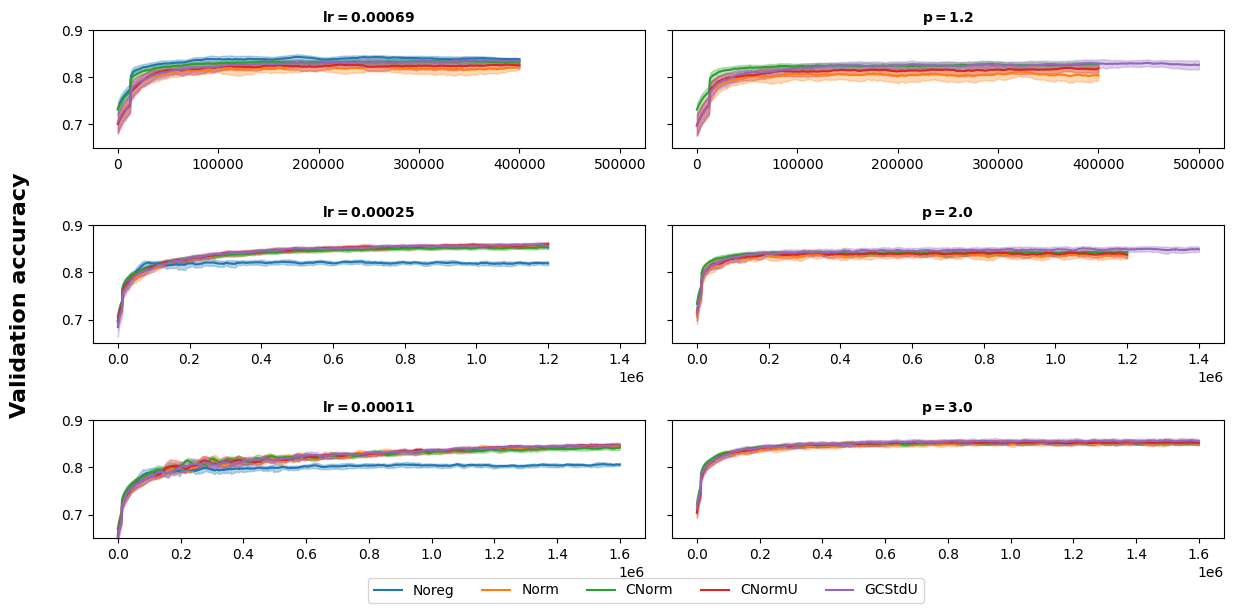

In [4]:
fig,axs = plt.subplots(ncols=2,nrows=3,sharey="all",sharex="row")

for i,p in enumerate(["1.2","2.0","3.0"]):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["noreg","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.025), bbox_transform=fig.transFigure)
fig.set_size_inches(12,6)
fig.tight_layout()
fig.savefig("./images/noreg_norm_gcstdu_accuracy.png", bbox_inches='tight',dpi=300)

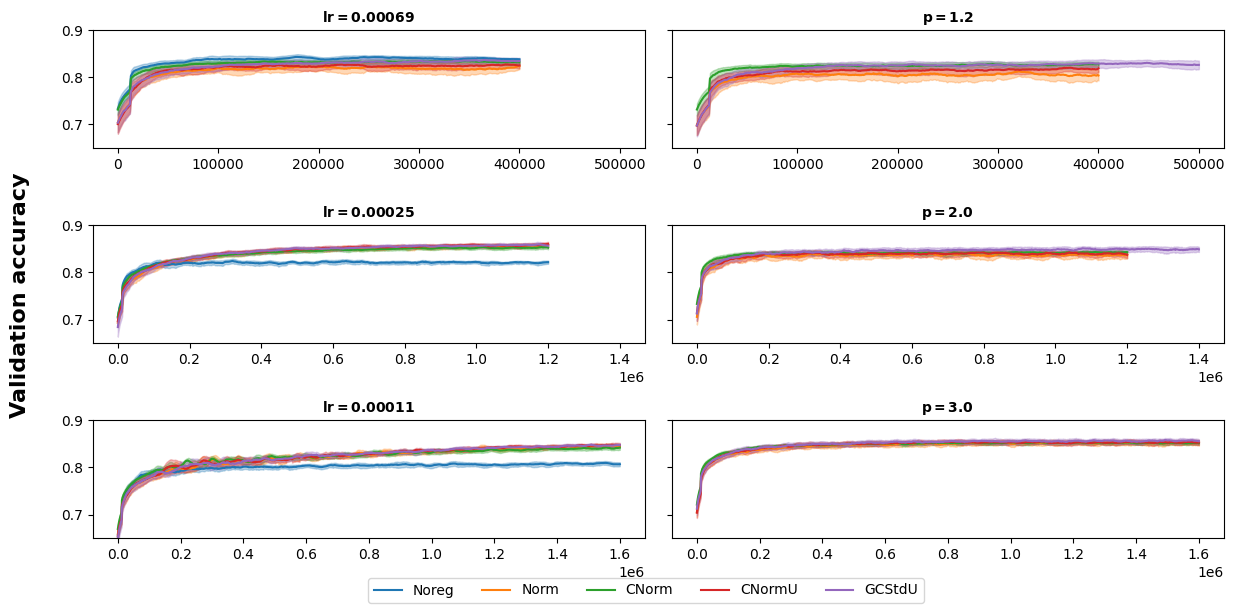

In [5]:
fig,axs = plt.subplots(ncols=2,nrows=3,sharey="all",sharex="row")

for i,p in enumerate(["1.2","2.0","3.0"]):

    lr = round(0.001/(float(p)**2),5)
    
    for exp,lbl in zip(["noreg_lrfix","norm_p1","cnorm_p1","cnormu_p1","gcstdu_p1"],["Noreg","Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{lr}","test_stats")
        if stats is not None:
            plot_step_stat(stats["acc"],axs[i][0],label=lbl,color=colors[lbl.lower()],smoothing=12)

    for exp,lbl in zip(["norm","cnorm","cnormu","gcstdu"],["Norm","CNorm","CNormU","GCStdU"]):
        stats = get_stats(f"{data_path}/{exp}/{p}_1","test_stats")
        plot_step_stat(stats["acc"],axs[i][1],label=lbl,color=colors[lbl.lower()],smoothing=12)
    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.025), bbox_transform=fig.transFigure)
fig.set_size_inches(12,6)
fig.tight_layout()
fig.savefig("./images/noreg_norm_gcstdu_accuracy.png", bbox_inches='tight',dpi=300)

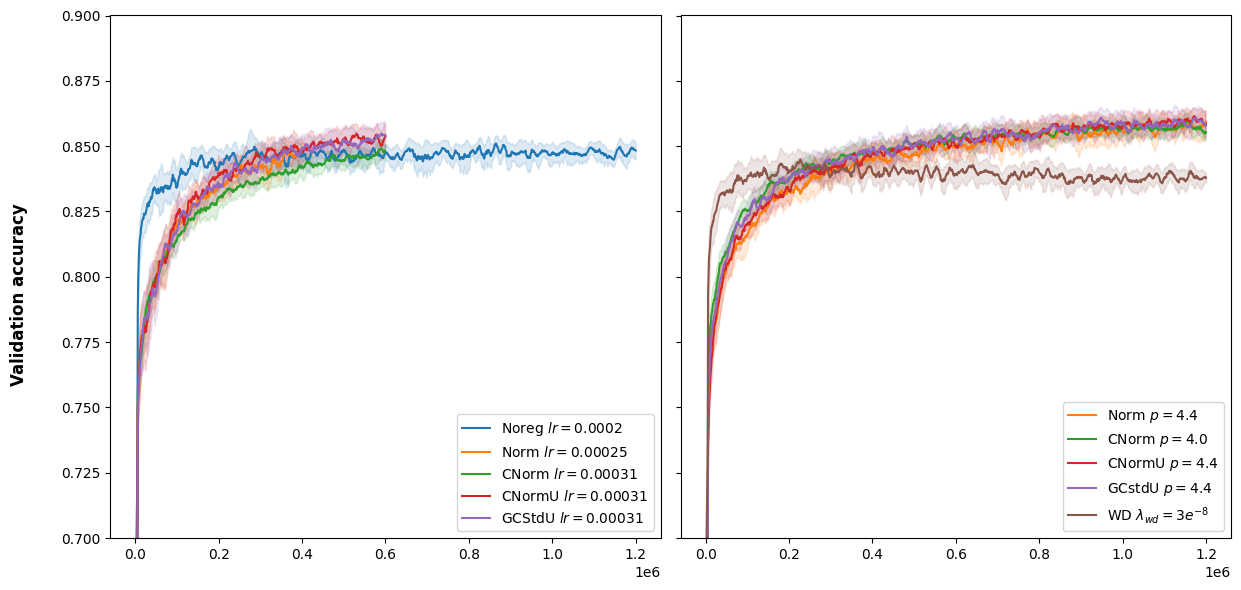

In [5]:
plot_wbn_best_hyperparameter_validation_curve(data_path,image_path,
                                              ["noreg/0.00278","norm_p1/0.00031","cnorm_p1/0.00025","cnormu_p1/0.00031","gcstdu_p1/0.00031",
                                               "norm/4.4_1","cnorm/4.0_1","cnormu/4.4_1","gcstdu/4.0_1","wd/3e-08"],
                                              [r"Noreg $lr = 0.0002$",r"Norm $lr = 0.00025$", r"CNorm $lr = 0.00031$", r"CNormU $lr = 0.00031$", r"GCStdU $lr = 0.00031$", 
                                               r"Norm $p=4.4$", r"CNorm $p=4.0$", r"CNormU $p=4.4$", r"GCstdU $p=4.4$",r"WD $\lambda_{wd}=3e^{-8}$"],
                                              ["noreg","norm","cnorm","cnormu","gcstdu","norm","cnorm","cnormu","gcstdu","wd"],
                                              split=5,
                                              max_step=1.2e6)

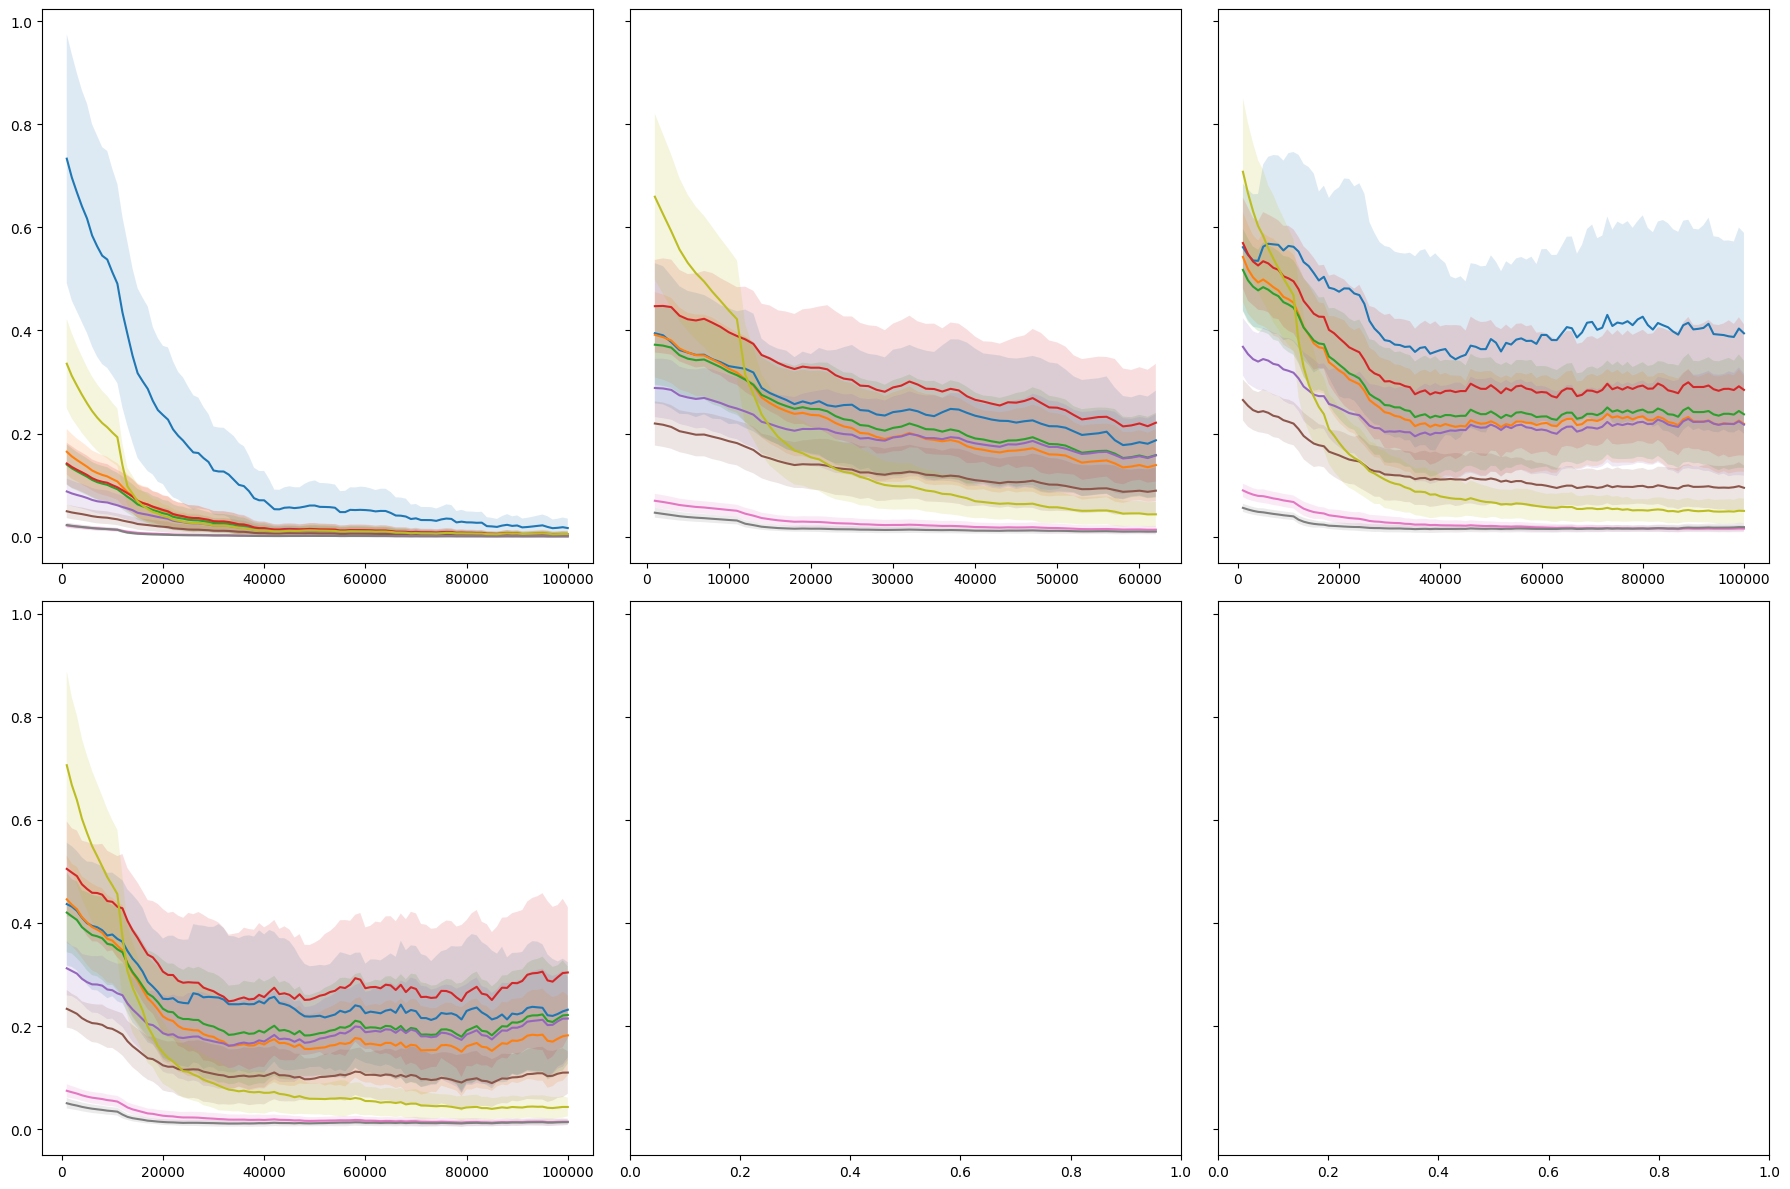

In [32]:
fig,axs = mg_spacing2(data_path,["noreg/0.00278","norm/4.4_1","cnorm/4.0_1","cnormu/4.4_1"],[r"Noreg $lr = 0.0002$", r"Norm $p=4.4$", r"CNorm $p=4.0$", r"CNormU $p=4.4$"],colors,"mg_spacing_0",ncols=3,nrows=2,smoothing=10)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/adam_wbn/wd/3e-08/mg_spacing_0/grads'

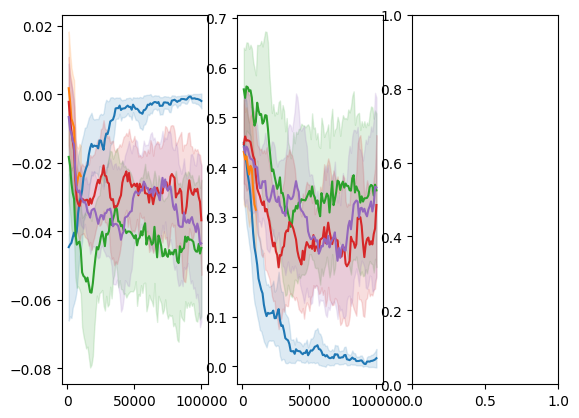

In [12]:
fig,axs = mg_spacing_and_bar_plot(data_path,exps,labels,colors,"mg_spacing_0")

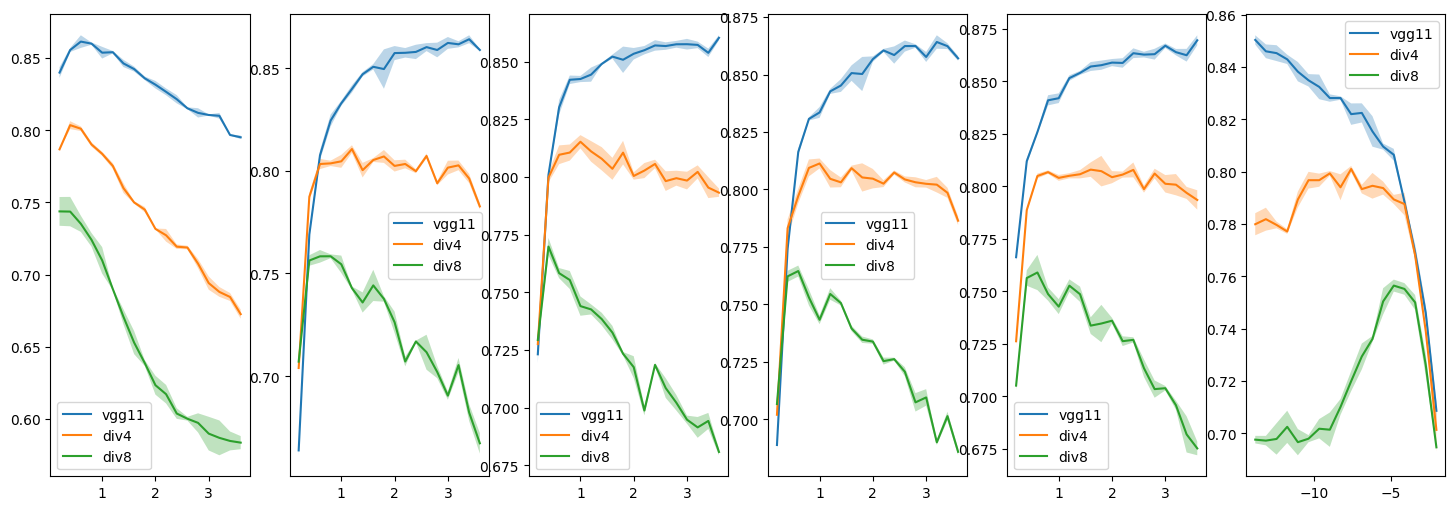

In [17]:
fig,axs = plt.subplots(ncols=6,nrows=1,sharey="col")
fig.set_size_inches(18,6)
for ax,exp,x_fn in zip(axs,["noreg","norm","cnorm","cnormu","gcstdu","wd"],[lr_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,wd_to_log_fn]):
    
    x,y,y_normed = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),x_fn,acc_fn, ax, "vgg11",norm=False)
    x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div4"),x_fn,acc_fn, ax, "div4",norm=False)
    x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div8"),x_fn,acc_fn, ax, "div8",norm=False)
    ax.legend()

In [ ]:

"""
for exp in ["norm","cnorm","cnormu","gcstdu"]:
    for suffix in ["","_div4","_div8"]:
        for p in ["2.0_1","1.6_1"]:
            os.makedirs(f"../../data/adam_wbn/{exp + suffix}/{p}")
            print(f'rsync -a hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/{exp + suffix}/{p}/ ./data/adam_wbn/{exp + suffix}/{p} --info=progress2 --exclude="grads" --exclude="hessians" --exclude="states"')
        for subexp in os.listdir(f"{data_path}/{exp + suffix}"):
            p = subexp.split("_")[0]
            if p=="3.4" or p == "3.0" or p=="2.6" or float(p)<2.3:
                print(f"{data_path}/{exp + suffix}/{subexp}")
                shutil.rmtree(args.save_path + "states")

for exp in ["wd"]:
    for suffix in ["","_div4","_div8"]:
        for subexp in os.listdir(f"{data_path}/{exp + suffix}"):
            p = subexp
            if float(p)>6.5e-05:
                print(f"{data_path}/{exp + suffix}/{subexp}")
                shutil.rmtree(f"{data_path}/{exp + suffix}/{subexp}")
"""

"""
for hyp in os.listdir("../../data/sgdm_wbn/noreg"):
    p = f"../../data/sgdm_wbn/noreg/{hyp}"
    with open(f"{p}/settings.json","r") as f:
        js = json.load(f)
    js["save_args"]["save_states_every"] = 100000
    js["save_args"]["save_grad_every"] = -1
    js["num_steps"] = 100000
    js["norm"] = {"change_scale": "identity", "norm_fn": "global_center_std_uncenter", "norm_multiply": 1, "norm_every": 1, "reverse_norms": False}
    new_p = f"../../data/sgdm_wbn/gcstdu_p1/{hyp}"
    os.makedirs(new_p,exist_ok=True)
    with open(f"{new_p}/settings.json","w") as f:
        json.dump(js,f,indent=4)

    print(f"python code/main.py ./data/sgdm_wbn/gcstdu_p1/{hyp}/ --reset")
"""

"""
import os
import json

for wrs,setting_parameter in [("norm","norm"),("cnorm","center_norm"),("cnormu","center_norm_uncenter"),("gcstdu","global_center_std_uncenter")]:
    for hyp in os.listdir(f"{data_path}/noreg"):
        if not (float(hyp)>0.06 or float(hyp) < 0.0001):
            p = f"{data_path}/noreg/{hyp}"
            new_p = f"{data_path}/{wrs}_p1/{hyp}"
            if os.path.exists(new_p):
                continue
            with open(f"{p}/settings.json","r") as f:
                js = json.load(f)
            js["save_args"]["save_grad_every"] = -1
            js["norm"] = {"change_scale": "identity", "norm_fn": setting_parameter, "norm_multiply": 1, "norm_every": 1, "reverse_norms": False}
            
            os.makedirs(new_p,exist_ok=True)
            with open(f"{new_p}/settings.json","w") as f:
                json.dump(js,f,indent=4)

            print(f"python code/main.py ./data/adam_wbn/{wrs}_p1/{hyp}/ --reset")
"""
"""
rm = []
for exp in ["norm","cnorm","cnormu","gcstdu"]:
    for hyp in os.listdir(f"{data_path}/{exp}"):
        p = f"{data_path}/{exp}/{hyp}"
        if float(hyp)>0.003:
            rm.append(f"rm -r ./data/adam_wbn/{exp}/{hyp}")

print(" && ".join(rm))
"""